![sslogo](https://github.com/stratascratch/stratascratch.github.io/raw/master/assets/sslogo.jpg)

# Statistics

- http://www.statsmodels.org/stable/index.html
- https://docs.scipy.org/doc/scipy/reference/stats.html

## Import the needed modules

If you want to run this notebook offline you will probably need to install `statsmodels`.

The python distribution we recommend is [Anaconda](https://www.anaconda.com/download/#linux).

In [3]:
pip install statsmodels

In [4]:
import pandas as pd
import numpy  as np
import psycopg2 as ps
import matplotlib.pyplot as plt

import scipy.stats as scp_stats

import statsmodels.api as sm

# ECDF = Empirical Cumulative Distribution Function
from statsmodels.distributions import ECDF

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


## Load the data

In [5]:
# Connect to database
host_name = 'db-strata.stratascratch.com'
dbname = 'db_strata'
port = '5432'
# TODO Write your username and database password in the following two variables
user_name = 'ankit082006' #enter username
pwd = 'ofkMQPktC' #enter your database password found in the profile tab in Strata Scratch

try:
    conn = ps.connect(host=host_name,database=dbname,user=user_name,password=pwd,port=port)
except ps.OperationalError as e:
    raise e
else:
    print('Connected!')

Connected!


In [0]:
def get_dataset(dataset_name):
    #Write SQL below to pull datasets 
    cur = conn.cursor()
    cur.execute(""" 
                SELECT *  FROM {0}; 
                """.format(dataset_name))
    data = cur.fetchall()
    colnames = [desc[0] for desc in cur.description] 
    conn.commit()

    #create the pandas dataframe
    dataframe = pd.DataFrame(data, columns=colnames)

    #close the connection
    cur.close()
    
    return dataframe

In [0]:
sat_scores = get_dataset("sat_scores")
flight_revenue = get_dataset("flight_revenue")
forbes_global = get_dataset("forbes_global_2010_2014")
iris = get_dataset("iris")

In [9]:
sat_scores.head()

,school,teacher,student_id,sat_writing,sat_verbal,sat_math,hrs_studied,id
0,Washington HS,Frederickson,1.0,583.0,307.0,528.0,190.0,1
1,Washington HS,Frederickson,2.0,401.0,791.0,248.0,149.0,2
2,Washington HS,Frederickson,3.0,523.0,445.0,756.0,166.0,3
3,Washington HS,Frederickson,4.0,306.0,269.0,327.0,137.0,4
4,Washington HS,Frederickson,5.0,300.0,539.0,743.0,115.0,5


In [13]:
sat_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,135.0,68.000000,39.115214,1.0,34.5,68.0,101.50,135.0
sat_writing,135.0,500.503704,162.220132,206.0,377.0,512.0,636.50,799.0
sat_verbal,135.0,495.725926,168.715535,200.0,361.0,488.0,641.50,799.0
sat_math,135.0,517.414815,180.212618,201.0,350.0,528.0,680.00,797.0
hrs_studied,128.0,100.546875,59.941554,0.0,51.0,95.5,156.25,200.0
id,135.0,68.000000,39.115214,1.0,34.5,68.0,101.50,135.0


In [11]:
flight_revenue.head()

,destination_airport,cargo_rev,first_class_rev,business_class_rev,coach_rev,id
0,SFO,10239,15747,12119,11782,1
1,LAX,17437,18874,10931,23363,2
2,JFK,10272,19153,10396,12549,3
3,ANC,10099,16796,6568,25099,4
4,LHR,13658,16068,13497,23195,5


In [15]:
flight_revenue.dtypes

destination_airport    object
cargo_rev              object
first_class_rev        object
business_class_rev     object
coach_rev              object
id                      int64
dtype: object

In [18]:
flight_revenue.count()

destination_airport    14
cargo_rev              14
first_class_rev        14
business_class_rev     14
coach_rev              14
id                     14
dtype: int64

In [14]:
flight_revenue.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14.0,7.5,4.1833,1.0,4.25,7.5,10.75,14.0


In [16]:
forbes_global.head()

,company,sector,industry,continent,country,marketvalue,sales,profits,assets,rank,forbeswebpage
0,ICBC,Financials,Major Banks,Asia,China,215.6,148.7,42.7,3124.9,1,http://www.forbes.com/companies/icbc/
1,China Construction Bank,Financials,Regional Banks,Asia,China,174.4,121.3,34.2,2449.5,2,http://www.forbes.com/companies/china-construc...
2,Agricultural Bank of China,Financials,Regional Banks,Asia,China,141.1,136.4,27.0,2405.4,3,http://www.forbes.com/companies/agricultural-b...
3,JPMorgan Chase,Financials,Major Banks,North America,United States,229.7,105.7,17.3,2435.3,4,http://www.forbes.com/companies/jpmorgan-chase/
4,Berkshire Hathaway,Financials,Investment Services,North America,United States,309.1,178.8,19.5,493.4,5,http://www.forbes.com/companies/berkshire-hath...


In [17]:
forbes_global.describe().T

,count,mean,std,min,25%,50%,75%,max
marketvalue,2000.0,22.20515,37.077202,0.0,5.90,10.75,22.125,483.1
sales,2000.0,19.18050,34.695518,0.0,4.20,9.20,18.825,476.5
profits,2000.0,1.46375,3.962383,-13.4,0.30,0.60,1.300,84.0
assets,2000.0,80.48720,256.077169,0.7,10.20,19.95,46.600,3270.1
rank,2000.0,1000.32450,577.397506,1.0,500.75,1000.50,1499.500,1999.0


### Fix the data

In [19]:
sat_scores.dtypes

school          object
teacher         object
student_id     float64
sat_writing    float64
sat_verbal     float64
sat_math       float64
hrs_studied    float64
id               int64
dtype: object

In [0]:
#Change the datatype
for cn in ["sat_math", "sat_writing", "sat_verbal", "hrs_studied"]:
    sat_scores[cn] = sat_scores[cn].astype(np.float64)
    


In [0]:
#Drop the column not required
sat_scores.drop(["student_id"], axis=1, inplace=True)

#Set the index
sat_scores.set_index(["id"], inplace=True)

In [22]:
sat_scores.dtypes

school          object
teacher         object
sat_writing    float64
sat_verbal     float64
sat_math       float64
hrs_studied    float64
dtype: object

In [23]:
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1 to 135
Data columns (total 6 columns):
school         135 non-null object
teacher        135 non-null object
sat_writing    135 non-null float64
sat_verbal     135 non-null float64
sat_math       135 non-null float64
hrs_studied    128 non-null float64
dtypes: float64(4), object(2)
memory usage: 7.4+ KB


In [0]:
flight_revenue.set_index("id", inplace=True)

for cn in ["cargo_rev", "first_class_rev", "business_class_rev", "coach_rev"]:
    flight_revenue[cn] = flight_revenue[cn].astype(np.float64)

In [25]:
flight_revenue.head()

,destination_airport,cargo_rev,first_class_rev,business_class_rev,coach_rev
id,,,,,
1,SFO,10239.0,15747.0,12119.0,11782.0
2,LAX,17437.0,18874.0,10931.0,23363.0
3,JFK,10272.0,19153.0,10396.0,12549.0
4,ANC,10099.0,16796.0,6568.0,25099.0
5,LHR,13658.0,16068.0,13497.0,23195.0


In [26]:
flight_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 1 to 14
Data columns (total 5 columns):
destination_airport    14 non-null object
cargo_rev              14 non-null float64
first_class_rev        14 non-null float64
business_class_rev     14 non-null float64
coach_rev              14 non-null float64
dtypes: float64(4), object(1)
memory usage: 672.0+ bytes


## Basic summary statistics

### Introduction

The most basic method is `describe`.

In [27]:
sat_scores.describe()

,sat_writing,sat_verbal,sat_math,hrs_studied
count,135.000000,135.000000,135.000000,128.000000
mean,500.503704,495.725926,517.414815,100.546875
std,162.220132,168.715535,180.212618,59.941554
min,206.000000,200.000000,201.000000,0.000000
25%,377.000000,361.000000,350.000000,51.000000
50%,512.000000,488.000000,528.000000,95.500000
75%,636.500000,641.500000,680.000000,156.250000
max,799.000000,799.000000,797.000000,200.000000


It returns a dataframe which can be indexed like any other dataframe to get the value of interest.

For example to get the minimal sat_verbal score.

In [28]:
sat_scores.describe().loc["min"]["sat_verbal"]

200.0

But that is not the best way to do things because time is spent calculating all other statistics which we probably don't care about.

To calculate a single statistic like in the previous example:

In [29]:
sat_scores["sat_verbal"].min()

200.0

### 3 types of averages

The average you are used to where you sum all values and divide by count is called the artithmetic average.

We have calculated it many times by now using the `mean` functions of pandas and numpy.

In [30]:
sat_scores.describe().loc["mean"]

sat_writing    500.503704
sat_verbal     495.725926
sat_math       517.414815
hrs_studied    100.546875
Name: mean, dtype: float64

But there are 2 more types of averages:
- Geometric mean
- Harmonic mean

#### Geometric mean

- https://en.wikipedia.org/wiki/Geometric_mean

This is the n-th root of product of all values where n is the count of values.

There is an easy way to calculate it using `scipy.stats` and the `gmean` method.

For example the geometric mean of writing scores.

In [31]:
scp_stats.gmean(sat_scores["sat_writing"])

471.7562033189293

#### Harmonic mean

- https://en.wikipedia.org/wiki/Harmonic_mean

This is defined as n / s where n is the count of observations and s is the sum of reciprocals of your values.

We can calculate it using the `hmean` method from `scipy.stats`.

In [32]:
scp_stats.hmean(sat_scores["sat_writing"])

440.84803805361383

#### All 3 of them together

In [33]:
print(sat_scores["sat_writing"].mean())
print(scp_stats.gmean(sat_scores["sat_writing"]))
print(scp_stats.hmean(sat_scores["sat_writing"]))

500.5037037037037
471.7562033189293
440.84803805361383


You see that you got different values and that is usually the case.

#### Which one to use?

Generally the arithmetic average works well enough when the numbers are balanced.

When the numbers aren't balanced (there are some small numbers, some big numbers) using geometric or harmonic will give values which are closer to the middle which is the goal of all averages.

### Sorting the numbers 

Sometimes the best way to understand the numerical data you have is to sort it first.

To sort in pandas we will use the `sort_values` method.

In [34]:
sat_scores["sat_math"].sort_values()

id
69     201.0
114    201.0
60     205.0
68     216.0
66     216.0
       ...  
87     767.0
6      771.0
40     780.0
21     796.0
118    797.0
Name: sat_math, Length: 135, dtype: float64

#### Quantiles/Percentiles 

We can think about quantiles in our data and describe the numbers with them.

A k-quantile is defined as the number which occupies the position k in the sorted list.

For convenience we do not deal with whole numbers but take k to be from 0 to 1.
- k = 0.25 is the first quartile, that is the number in the sorted list located at 0.25 * list_length.
- k = 0.5 means that the number which is at half the sorted list and is usually called the median.
- k = 0.75 is the third quartile, that is the number in the sorted list located at 0.25 * list_length.

To find quantiles for pandas Series we use the `quantile` method.

#### Example 1

The median (0.5-th quantile)

In [37]:
sat_scores.hrs_studied.quantile(0.5)

95.5

#### Example 2

The first and third quartiles.

In [38]:
sat_scores.hrs_studied.quantile([0.25, 0.75])

0.25     51.00
0.75    156.25
Name: hrs_studied, dtype: float64

#### Range

Once you sort your data you can say what is the range of values it contains.

The range is defined as the difference between the maximum and the minimum of the numbers.

In [39]:
maximum = sat_scores.hrs_studied.max()
minumum = sat_scores.hrs_studied.min()

hrs_studied_range = maximum - minumum

hrs_studied_range

200.0

#### Interquantile Range (IQR)

This statistic is defined as the difference between the third quartile and the first quartile.

It useful for outlier detection, a topic discussed later.

In [40]:
q25 = sat_scores.hrs_studied.quantile(0.25)
q75 = sat_scores.hrs_studied.quantile(0.75)

hrs_studied_iqr = q75 - q25

hrs_studied_iqr

105.25

### The mode

Mode is a very important statistics. The mode of your data is the number or category which occurs most (has the highest probability in math speak).

All other statistics described by now are not applicable to categorical data but mode is.

You can find the mode using the `value_counts` function.

For example to find the most common professor.

In [44]:
sat_scores.groupby('teacher').count()

,school,sat_writing,sat_verbal,sat_math,hrs_studied
teacher,,,,,
Brown,17,17,17,17,17
Davis,13,13,13,13,11
Frederickson,13,13,13,13,12
Perry,23,23,23,23,22
Rajaram,20,20,20,20,20
Spellman,18,18,18,18,17
Tran,15,15,15,15,13
Williams,16,16,16,16,16


In [41]:
sat_scores.teacher.value_counts()[:1]

Perry    23
Name: teacher, dtype: int64

In [42]:
sat_scores.teacher.mode()

0    Perry
dtype: object

### Visual representations of your numbers

#### Histograms

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


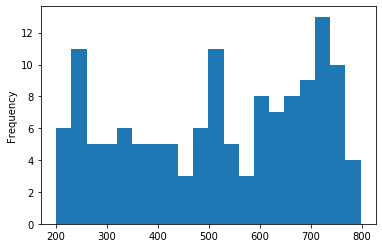

In [45]:
sat_scores.sat_math.plot('hist', bins=20)
plt.show()

Above we defined mode as a single value and in the global sense when we look at all data there can be only one.

In the histogram above we see that is somewhere around 730. So the most common score was around 730 but what does that tell us of the whole picture, not much really.

Because of that people will sometime talk about multi-modal histograms. Multi-modal means that there are many modes, each being a peak surrounded by valeys in the histogram plot. In this case we have a mode around 250, a mode around 500 and the one we saw before around 730. I chose these on my personal preference and there is no strict definition of multi-modality. But you can pick as many as you want from the `value_counts` list as long as that makes sense to you.

#### Box plots

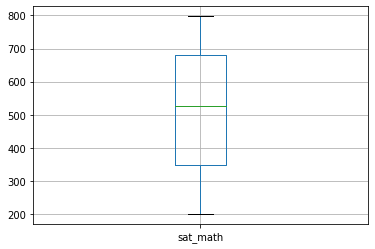

In [46]:
sat_scores.boxplot(column=["sat_math"])
plt.show()

These plots are a visual representation of almost everything we learned in the sorting your number section.
- The two black lines, highest and lowest y-values, are the 75% and 25% percentile.
- The green line is the median (50% percentile)

These plots also sometimes show dots. These are called outliers, as determined by the IQR test.

The following box plot from the iris dataset shows outliers.

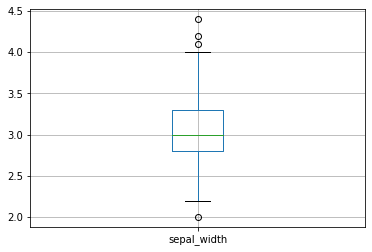

In [47]:
iris.boxplot(column="sepal_width")
plt.show()

#### Outliers

Outliers are numbers/data points which don't fit in with the data.
- For example if you had the numbers 1,7, 3, 5, 21, 1000 the number 1000 is way too big for this dataset.

There are many tests to see if a data point is an outlier but the one used for drawing boxplots is called the IQR-test for inter quartile range.

A point is an outlier if it's either:
- Bigger than Q3 + 1.5 * IQR (Q3 = third quartile, 75% percentile)
- Smaller than Q1 - 1.5 * IQR (Q1 = first quartile, 25% percentile)

### Measuring variance

Variance as a single number describes how far are the numbers from the mean.
- A high variance means that every number tries to escape from the mean.
- A low variance means that every number tries to be as close as possible to the mean.

Generally you always want small variance because higher variance corresponds to higher uncertainity.

To illustrate: Assume you are a manager in a chocolate factory. Your orders are that each chocolate weighs 100 grams. If your orders are disobeyed each cholocate off the shelves will have a different amount of grams (some 30g, some 150g, some 60g, some 250g) and your business could suffer because you don't get enough revenue to cover expenses.

Still having high variance is not inherently bad because there are cases where diversity is OK like for example the variance in age of patients.

Along with variance comes a related quantity called the standard deviation which is the square root of variance.

To find the standard deviation we use the `std` method.

In [48]:
sat_scores["sat_writing"].std()

162.2201320885818

To find the variance we square the resuls from above.

In [49]:
sat_scores["sat_writing"].std() ** 2

26315.37125483693

Generally we always use the standard deviation because it is a number which is close to other numbers in the dataset.

To correctly interpret mean (arithmetic average), standard deviation and the quantiles you need to know what distribution your data comes from.

### Correlation between two columns

Correlation is linear dependence and correlation coefficient is a number from 0 to 1 which helps us quantify that dependence.

To calculate it we can use `scp_stats.pearsonr`. 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
- Pearson was the scientist who invented this number so it is named after him.

For example let's see if hours studied correlate with max score in any of 3 tests (more hours, bigger score)

In [50]:
max_score = sat_scores[["sat_writing", "sat_math", "sat_verbal"]].apply(np.max, axis=1)

# Fill NaNs with mean value
hrs_studied = sat_scores.hrs_studied.fillna(value=sat_scores.hrs_studied.mean())

corr_coef, _ = scp_stats.pearsonr(hrs_studied, max_score)

corr_coef

0.07966449616970446

This number is very low so we conclude that there is no linear dependence.

## Distributions

We will start from Empirical Cumulative Distribution Functions.

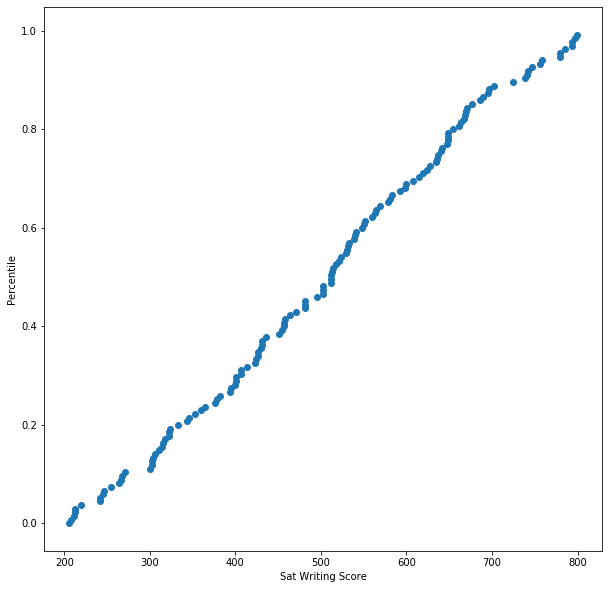

In [51]:
vals = sat_scores["sat_writing"].sort_values()

plt.figure(figsize=(10, 10))
plt.scatter(vals, np.arange(0, len(vals)) / len(vals), marker='o')
plt.xlabel("Sat Writing Score")
plt.ylabel("Percentile")
plt.show()

What we see here is called the empirical cumulative distribution function.

On the Y-axis we see the position of the item in the sorted list as a percent 0 to 1.

On the X-axis we see the values from 200 too 800 from sat writing scores.

A reading of (400, 0.2) means that 20% of the numbers are smaller than 400.

A reading of (500, 0.4) means that 40% of the numbers are smaller than 500.

We can also use it to answer questions like how many observations are between 300 and 500.
We find (500, 0.4) and find (300, 0.15) and we can say that 0.4 - 0.15 = 0.25 => 25% percent of the scores we have in our data are between 300 and 500.

From here you can see all the percentiles. E.g. The median is around 520 from visual inspection.

There is a lot of information you can see from here, and that is why people invented boxplots for quick summaries.

We can also extend this plot to show the mean, median and mode.

Mean 500.5037037037037
Median 512.0
Mode 481.0


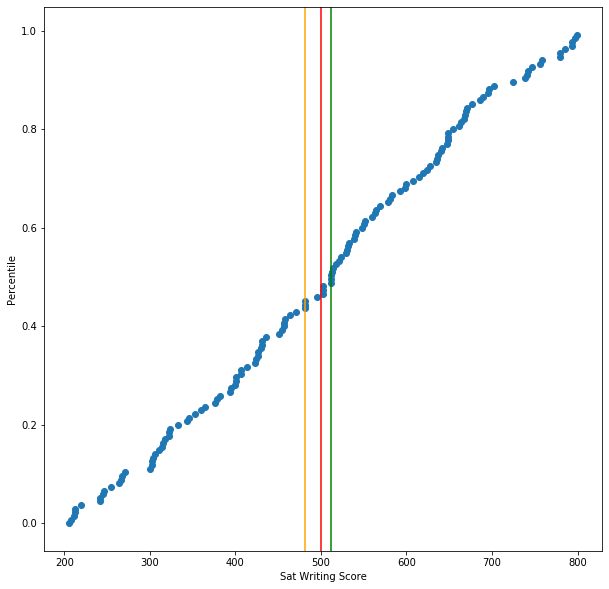

In [53]:
vals = sat_scores["sat_writing"].sort_values()

mu = vals.mean()
median = vals.median()
mode = vals.value_counts().index[0]

print("Mean " + str(mu))
print("Median " + str(median))
print("Mode " + str(mode))

plt.figure(figsize=(10, 10))
plt.scatter(vals, np.arange(0, len(vals)) / len(vals), marker='o')
plt.gca().axvline(mu, color='red')
plt.gca().axvline(median, color='green')
plt.gca().axvline(mode, color='orange')
plt.xlabel("Sat Writing Score")
plt.ylabel("Percentile")
plt.show()

To make our notion of how many numbers are between a and b precise and not just visual guesswork we need to create an ECDF from the `statsmodels` package. 

Using that function creates a new function that allows us to answer the question: How many values are smaller than my value of interest.

In [52]:
# This is a function
sat_writing_cdf = ECDF(sat_scores.sat_writing)

between300_and500 = sat_writing_cdf(500) - sat_writing_cdf(300)

print(100 * between300_and500)

34.81481481481482


So the guess we had was about 10% wrong so never use intutition when exact numbers can be calculated.

### The uniform distribution

- https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)

This is the simplest distribution of numbers where each number is distributed purely randomly with 0 bias in range _a_ to _b_, _a_ < _b_.

### The normal distribution

- https://en.wikipedia.org/wiki/Normal_distribution

This is the most common distribution of numbers in nature and is known as the bell curve.
- The curve is always centered on the mean of the numbers.
- The height of the peak and the width of the curve depend on variance
    - High variance, low height and high width.
    - Low variance, high height and low width.
    
This behaviour coincides with the interpretation of variance as uncertainty seen above. More variance mean the probability is distributed away from the mean.

This distribution is also very important for the Z-test we will see later.

### The t-distribution

- https://en.wikipedia.org/wiki/Student's_t-distribution

Looks similar to normal and actually becomes normal after its DoF paramater reaches infinity.

In practical use cases having DoF >= 30 means this distribution is normal.

The width of the curve depends on the DoF paramater and you will see that DoF = n - 1 where n is the number of samples we have.

## Hypothesis testing

We have many beliefs and hypothesis about our *world*.

Here are some examples:
- The mean writing score is 500
- The standard deviation of writing score is 200
- The distribution of writing scores is normal.
- Students from St. John's and students from Washington HS have different mean results/
- ...

The data we have can be used to help us confirm or reject these hypotheses and these is where tests come to use.

### Terminology

There is a lot of math behind all of this but the most important things to know are:
- Null Hypothesis (H0) - This is what we believe is true
- Alternative Hypothesis (Ha) - This is the opposite of H0
- Rejecting - Claim that H0 is false and Ha is true
- Accepting - Claim that H0 is true and Ha is false
- Significance level - Sometimes called alpha is the probability of accepting H0 when it is false in nature but our data says it is true
- Test-statistic - some number we get from our data that describes the mean, the difference between means, the variance or whatever depending on the context.
- p-value - Probability that H0 is false given the value of our test statistic. We reject H0 if the p-value is smaller than the signifance level.

And the most important thing of them all:
- We make hypothesis about the state of the world, not the state of our data.
- We use to data to prove them or disprove them but never make hypothesis about data.

### Testing for mean = constant

- http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html#statsmodels.stats.weightstats.ztest

This is the easiest case and we will now what all that stuff meant.

We will learn about the 1-sample Z-test.

Let's say I believe that the mean writing score is 600, thus:
- H0: mean = 600
- Ha: mean != 600

To test that we can use `statsmodels.api.stats.ztest`.

In [54]:
test_statistic, p_value = sm.stats.ztest(sat_scores.sat_writing, value=600)

print("Z-test statistic is " + str(test_statistic))
print("p-value is " + str(p_value))

Z-test statistic is -7.126381176063617
p-value is 1.030421117356416e-12


Our p-value is less than 0.05 which we choose as our significance level, actually much much smaller.

That means that we reject the hypothesis that true writing scores have a mean of 600.

Usually we always choose 0.05 as alpha.

What if we tried some value closer to the mean we got from the data.

In [55]:
test_statistic, p_value = sm.stats.ztest(sat_scores.sat_writing, value=510)

print("Z-test statistic is " + str(test_statistic))
print("p-value is " + str(p_value))

Z-test statistic is -0.6801683046242968
p-value is 0.4963978989048442


Now we got a high p-value and so we accept the null hypothesis that mean=510.

The interpretation of this is that the data confirmed our hypothesis.

Once again we will have to warn that this is a slippery slope and you should be very careful designing your hypothesis.

#### One-sided vs two-sided

What we did by now were so-called two-sided tests because our alternative hypothesis was of the form mean != 600 but we can also test for cases mean <= 600 or mean >= 600 which are called onesided tests.

To tell the method we want a one sided test we need to make a single change.
- Set the `alternative` parameter to "smaller" or "larger".

In this example we say that:
- H0: mean < 600
- Ha: mean > 600

Thus the alternative parameters refers to the alternative hypothesis :)

In [0]:
test_statistic, p_value = sm.stats.ztest(sat_scores.sat_writing, 
                                         value=600, 
                                         alternative='larger')

print("Z-test statistic is " + str(test_statistic))
print("p-value is " + str(p_value))

Z-test statistic is -7.126381176063617
p-value is 0.9999999999994847


### Testing for two means being equal

- http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html#statsmodels.stats.weightstats.ttest_ind

When we want to answer questions like do group A and group B have a same mean we use this test.

As an example we will look at students from Washingon and St Jhon's and compare their performance means for equality.
- H0: The two groups have equal mean (the difference in means is equal to 0)
- Ha: The means are not equal

When testing for two groups we need to make a choice between using their pooled variance or their separate variances, thus the parameter `usevar` can be one of:
- "pooled"
- "unequal"

In [0]:
wash = sat_scores.query("school=='Washington HS'")["sat_verbal"]
jhon = sat_scores.query('school=="St. John\'s"')["sat_verbal"]

statistic, p_value, _ = sm.stats.ttest_ind(wash, jhon, value=0, usevar="pooled")

print("P-value is " + str(p_value))

P-value is 0.9677369665089817


We got a very high p-value which means that our null hypothesis that the means are close are confirmed by our data but keep in mind that we had a small sample size, 31 students in Washington HS and 51 students in St. Jhon's. 

In [0]:
wash.mean(), jhon.mean()

(497.5483870967742, 495.96078431372547)

## Contigency Tables

Contigency tables are a form of summary that shows counts for pairs of categories.

For example we can make a contigency table from our `sat_scores` dataset based on Professors and High Schools. 

To do that we will use the [`crosstab`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) method from pandas.
- The first argument is the data for rows
- Second is the data for columns.

In [56]:
pd.crosstab(sat_scores["school"], sat_scores["teacher"])

teacher,Brown,Davis,Frederickson,Perry,Rajaram,Spellman,Tran,Williams
school,,,,,,,,
Petersville HS,17,13,0,23,0,0,0,0
St. John's,0,0,0,0,20,0,15,16
Washington HS,0,0,13,0,0,18,0,0


You can test for independence using functionality from `statsmodels`.
- http://www.statsmodels.org/stable/contingency_tables.html

The idea is to first create a contigency table in their format from our crosstab results and call the `test_nominal_association` method.

In [57]:
table = sm.stats.Table(pd.crosstab(sat_scores["school"], sat_scores["teacher"]))

table.test_nominal_association().pvalue

0.0

In [60]:
table.table_orig

teacher,Brown,Davis,Frederickson,Perry,Rajaram,Spellman,Tran,Williams
school,,,,,,,,
Petersville HS,17,13,0,23,0,0,0,0
St. John's,0,0,0,0,20,0,15,16
Washington HS,0,0,13,0,0,18,0,0


We got a p-value of 0.0 which means that the hypothesis teachers and schools are independent is rejected.

This makes perfect sense because one teacher works only at a single school and they are 100% dependent (see all the 0s in the table).

## Case Study 

This lesson is accompanied by a case study [medical appointments](https://github.com/stratascratch/stratascratch.github.io/tree/master/Data%20Analytics%20Case%20Studies/Medical%20Appointments.md).

The solutions notebook for the study is available [here](https://colab.research.google.com/drive/1iTKUv7KEqwyicudr_yKNWV1GgsPQKfx6) 

## Exercises

We will use the `forbes_global` dataset here.

In [62]:
forbes_global.head()

,company,sector,industry,continent,country,marketvalue,sales,profits,assets,rank,forbeswebpage
0,ICBC,Financials,Major Banks,Asia,China,215.6,148.7,42.7,3124.9,1,http://www.forbes.com/companies/icbc/
1,China Construction Bank,Financials,Regional Banks,Asia,China,174.4,121.3,34.2,2449.5,2,http://www.forbes.com/companies/china-construc...
2,Agricultural Bank of China,Financials,Regional Banks,Asia,China,141.1,136.4,27.0,2405.4,3,http://www.forbes.com/companies/agricultural-b...
3,JPMorgan Chase,Financials,Major Banks,North America,United States,229.7,105.7,17.3,2435.3,4,http://www.forbes.com/companies/jpmorgan-chase/
4,Berkshire Hathaway,Financials,Investment Services,North America,United States,309.1,178.8,19.5,493.4,5,http://www.forbes.com/companies/berkshire-hath...


#### Exercise 1

Show me the geometric mean marketvalue per contintent.

Hint: GroupBy objects have an `apply` method.

In [67]:
#scp_stats.gmean(sat_scores["sat_writing"])
forbes_global.groupby('continent').apply(lambda grp: scp_stats.gmean(grp.marketvalue))


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:324: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


continent
Africa            0.000000
Asia              0.000000
Australia        14.435557
Europe           13.446678
North America    16.545232
South America    10.409348
dtype: float64

#### Exercise 2

What is the range of sales per sector.

In [73]:
forbes_global.groupby('sector')['sales'].max()

sector
Consumer Discretionary        476.5
Consumer Staples              126.8
Energy                        451.4
Financials                    178.8
Health Care                   130.1
Industrials                   143.3
Information Technology        208.9
Materials                     232.6
Telecommunication Services    128.8
Utilities                     162.6
Name: sales, dtype: float64

In [74]:
forbes_global.groupby('sector')['sales'].min()

sector
Consumer Discretionary        0.0
Consumer Staples              1.6
Energy                        1.7
Financials                    0.0
Health Care                   1.2
Industrials                   1.2
Information Technology        0.7
Materials                     0.7
Telecommunication Services    2.9
Utilities                     1.0
Name: sales, dtype: float64

In [75]:
forbes_global.groupby('sector')['sales'].max() - forbes_global.groupby('sector')['sales'].min()

sector
Consumer Discretionary        476.5
Consumer Staples              125.2
Energy                        449.7
Financials                    178.8
Health Care                   128.9
Industrials                   142.1
Information Technology        208.2
Materials                     231.9
Telecommunication Services    125.9
Utilities                     161.6
Name: sales, dtype: float64

#### Exercise 3

What country has the smallest variance in profits?

In [0]:
tmp=forbes_global.groupby('country')['profits'].std()**2

In [80]:
type(tmp)

pandas.core.series.Series

In [83]:
tmp.sort_values(ascending=True).idxmin()

'Lebanon'

#### Exercise 4

Show me the median values for us companies working in sectors Energy and Industrials.

In [84]:
forbes_global.sector.unique()

array(['Financials', 'Energy', 'Industrials', 'Consumer Discretionary',
       'Information Technology', 'Telecommunication Services',
       'Consumer Staples', 'Health Care', 'Materials', 'Utilities', None],
      dtype=object)

In [92]:
forbes_global.head(1)

,company,sector,industry,continent,country,marketvalue,sales,profits,assets,rank,forbeswebpage
0,ICBC,Financials,Major Banks,Asia,China,215.6,148.7,42.7,3124.9,1,http://www.forbes.com/companies/icbc/


In [0]:
tmp1=forbes_global[forbes_global.country=='United States']
tmp1=tmp1[tmp1.sector.isin(['Energy','Industrials'])]

In [100]:
tmp1

,company,sector,industry,continent,country,marketvalue,sales,profits,assets,rank,forbeswebpage
5,Exxon Mobil,Energy,Oil & Gas Operations,North America,United States,422.3,394.0,32.6,346.8,6,http://www.forbes.com/companies/exxon-mobil/
6,General Electric,Industrials,Conglomerates,North America,United States,259.6,143.3,14.8,656.6,7,http://www.forbes.com/companies/general-electric/
17,Chevron,Energy,Oil & Gas Operations,North America,United States,227.2,211.8,21.4,253.8,18,http://www.forbes.com/companies/chevron/
76,ConocoPhillips,Energy,Oil & Gas Operations,North America,United States,86.3,55.6,9.2,118.1,76,http://www.forbes.com/companies/conocophillips/
83,Boeing,Industrials,Aerospace & Defense,North America,United States,95.3,86.6,4.6,92.7,84,http://www.forbes.com/companies/boeing/
...,...,...,...,...,...,...,...,...,...,...,...
1961,Western Refining,Energy,Oil & Gas Operations,North America,United States,3.2,10.1,0.3,5.5,1961,http://www.forbes.com/companies/western-refining/
1965,Joy Global,Industrials,Heavy Equipment,North America,United States,5.8,4.7,0.4,5.5,1965,http://www.forbes.com/companies/joy-global/
1973,Oceaneering International,Energy,Oil Services & Equipment,North America,United States,7.8,3.3,0.4,3.1,1973,http://www.forbes.com/companies/oceaneering-in...
1984,URS,Industrials,Construction Services,North America,United States,3.5,11.0,0.2,8.7,1985,http://www.forbes.com/companies/urs/


In [101]:
tmp1.median()

marketvalue     17.40
sales           12.95
profits          0.80
assets          18.80
rank           755.00
dtype: float64

#### Exercise 5

What is the interquartile range for assets globally? What is the country with most companies (the mode of the `country` column) 

In [102]:
forbes_global.head()

,company,sector,industry,continent,country,marketvalue,sales,profits,assets,rank,forbeswebpage
0,ICBC,Financials,Major Banks,Asia,China,215.6,148.7,42.7,3124.9,1,http://www.forbes.com/companies/icbc/
1,China Construction Bank,Financials,Regional Banks,Asia,China,174.4,121.3,34.2,2449.5,2,http://www.forbes.com/companies/china-construc...
2,Agricultural Bank of China,Financials,Regional Banks,Asia,China,141.1,136.4,27.0,2405.4,3,http://www.forbes.com/companies/agricultural-b...
3,JPMorgan Chase,Financials,Major Banks,North America,United States,229.7,105.7,17.3,2435.3,4,http://www.forbes.com/companies/jpmorgan-chase/
4,Berkshire Hathaway,Financials,Investment Services,North America,United States,309.1,178.8,19.5,493.4,5,http://www.forbes.com/companies/berkshire-hath...


In [103]:
Q1=forbes_global.assets.quantile(0.25)
Q3=forbes_global.assets.quantile(0.75)
IQR=Q3-Q1
IQR

36.400000000000006

In [110]:
forbes_global.company.mode()

0                            3M
1                       77 Bank
2                           A2A
3                           ABB
4                           ACE
                 ...           
1995           Zodiac Aerospace
1996                     Zoetis
1997    Zoomlion Heavy Industry
1998     Zurich Insurance Group
1999                       eBay
Length: 2000, dtype: object

In [112]:
forbes_global.groupby('country').sum()

,marketvalue,sales,profits,assets,rank
country,,,,,
Australia,1008.7,588.5,62.4,3801.1,33372
Austria,74.2,146.4,4.3,679.4,10700
Bahrain,6.3,2.7,0.8,59.2,3313
Belgium,264.9,164.9,18.9,1024.4,11046
Bermuda,66.8,39.8,7.7,153.0,11984
...,...,...,...,...,...
United Arab Emirates,157.4,46.1,9.4,499.0,15756
United Kingdom,2569.2,2076.8,145.3,14325.6,82519
United States,18219.1,11518.9,1141.3,37066.8,532628


In [113]:
mode_company = forbes_global.country.value_counts().idxmax()
mode_company

'United States'

#### Exercise 6

Make a histogram of assets globally and ECDF plot for assets. Explain what do you see on these plots!

(array([1.96301925, 0.        , 0.        , 0.56568727, 0.        ,
        0.        , 0.        , 0.3335022 , 0.        , 0.        ,
        0.19419115, 0.        , 0.        , 0.        , 0.1266464 ,
        0.        , 0.        , 0.13086795, 0.        , 0.        ,
        0.        , 0.10553867, 0.        , 0.        , 0.        ,
        0.0717663 , 0.        , 0.        , 0.02955083, 0.        ,
        0.        , 0.        , 0.01688619, 0.        , 0.        ,
        0.01266464, 0.        , 0.        , 0.        , 0.01688619,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00422155]),
 array([ 1.  ,  1.28,  1.56,  1.84,  2.12,  2.4 ,  2.68,  2.96,  3.24,
         3.52,  3.8 ,  4.08,  4.36,  4.64,  4.92,  5.2 ,  5.48,  5.76,
         6.04,  6.32,  6.6 ,  6.88,  7.16,  7.44,  7.72,  8.  ,  8.28,
         8.56,  8.84,  9.12,  9.4 ,  9.68,  9.96, 10.24, 10.52, 10.8 ,
        11.08, 11.36, 11.64, 11.92

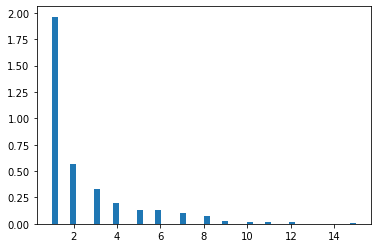

In [115]:
plt.hist(forbes_global.assets.value_counts(),  bins=50, density=True)

In [116]:
forbes_global_assets_cdf=ECDF(forbes_global.assets)
forbes_global_assets_cdf

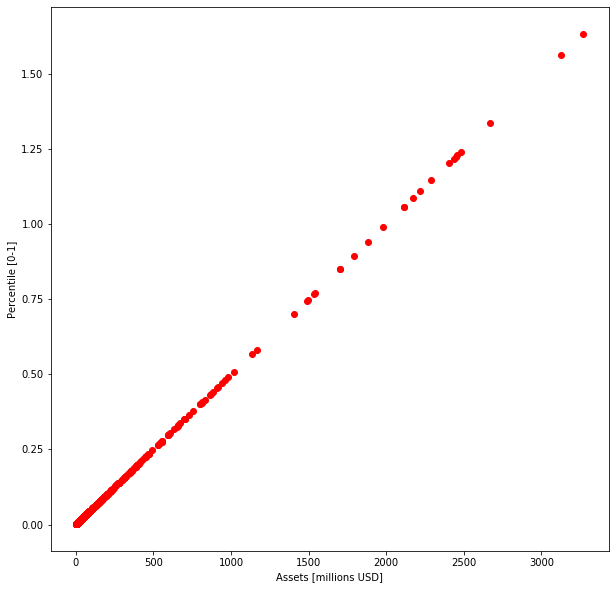

In [117]:
vals = forbes_global.assets.sort_values()

plt.figure(figsize=(10, 10))
plt.scatter(vals, vals / len(vals), marker='o', color='red')
plt.xlabel("Assets [millions USD]")
plt.ylabel("Percentile [0-1]")
plt.show()

#### Exercise 7

Make a function from the empirical cumulative distribution function of assets and use it to tell me how much of the whole world assets are taken by assets less than 500 million USD.

Hint: Use statsmodels and ECDF function.

In [120]:
forbes_global_assets_cdf=ECDF(forbes_global.assets)
forbes_global_assets_cdf(500)*100

96.89999999999999

#### Exercise 8

I believe that consumer discretionary and consumer staples sectors tend to have similar means in assets. Prove me or disprove me.  The significance level is 0.05

Explain your proof in terms of the p-value. 

What is the effect of using pooled or unequal variance?

Hint: Use the two-sample t-test.

In [122]:
cd = forbes_global[forbes_global.sector == 'Consumer Discretionary'].assets
cs = forbes_global[forbes_global.sector == 'Consumer Staples'].assets

_, p_value_pooled, _ = sm.stats.ttest_ind(cd, cs, value=0, usevar="pooled") #for assumption of same mean

_, p_value_sep, _    = sm.stats.ttest_ind(cd, cs, value=0, usevar="unequal") #for assumption of different mean

p_value_pooled, p_value_sep

(0.35533202897099725, 0.2728663179973006)

p_value_pooled>p_value_sep, so same mean assumption seems True

Looking at how both p-values are high we can accept the Null Hypothesis that the means are equal between these two sectors.

#### Exercise 9

What is the correlation coefficent between profits and assets globally? What does the calculated value mean?

In [123]:


corr_coef, _ = scp_stats.pearsonr(forbes_global.assets, forbes_global.profits)

corr_coef

0.5518257385904095

#### Exercise 10

I believe sectors and countries are dependent on each other with some sectors doing better in some countries compared to others (for various factors like natural resources, education structure, innovativeness etc).

Use a contigency table to validate this claim.

In [126]:
pd.crosstab(forbes_global["sector"], forbes_global["country"])

table = sm.stats.Table(pd.crosstab(forbes_global["sector"], forbes_global["country"]))

table.test_nominal_association().pvalue

0.05784203695013512

pvalue>0.05, so assumption is wrong